# Visually Exploring NHL Career Statistics and Predicting Future Members of the Hall of Fame

In [1]:
import pandas as pd
import yellowbrick
pd.set_option('display.max_columns', None)

### Step 1:  Load data into a dataframe

In [2]:
filename = "NHL.csv"
data = pd.read_csv(filename, index_col = 0)

### Step 2:  check the dimension of the table

In [3]:
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (1914, 12)


### Step 3:  Look at the data

In [4]:
data.head()

,Name,Country,GamesPlayed,Goals,Assists,Points,PlusMinus,ShotsOnGoal,GameWinningGoals,ShootingPercentage,AvgPlusMinus,in_HOF
926,"Landeskog, Gabriel",Sweden,82,22,30,52,20,270,5,0.081481,0.243902,0
598,"Grabner, Michael",Austria,174,59,36,95,-3,465,7,0.126882,-0.017241,0
1261,"Nodl, Andreas",Austria,175,15,20,35,-8,201,2,0.074627,-0.045714,0
1794,"Vanek, Thomas",Austria,547,230,217,447,35,1516,39,0.151715,0.063985,0
858,"Koltsov, Konstantin",Belarus,144,12,26,38,-42,199,3,0.060302,-0.291667,0


### Step 5:  what type of variables are in the table 

In [5]:
data.describe()

Describe Data


,GamesPlayed,Goals,Assists,Points,PlusMinus,ShotsOnGoal,GameWinningGoals,ShootingPercentage,AvgPlusMinus,in_HOF
count,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000
mean,467.333856,111.316092,152.663532,263.979624,-4.723615,880.187043,15.208464,0.115873,-0.042202,0.037618
std,321.960185,121.957839,173.744128,290.916182,66.381191,850.622385,17.624708,0.034213,0.126443,0.190319
min,82.000000,0.000000,2.000000,3.000000,-240.000000,15.000000,0.000000,0.000000,-0.519608,0.000000
25%,194.000000,25.000000,34.000000,58.000000,-35.000000,246.000000,3.000000,0.093827,-0.114744,0.000000
50%,390.000000,68.000000,89.000000,157.000000,-12.000000,605.000000,9.000000,0.115883,-0.042604,0.000000
75%,674.000000,156.750000,207.750000,369.000000,10.750000,1247.750000,21.000000,0.138377,0.029261,0.000000
max,1756.000000,894.000000,1963.000000,2857.000000,518.000000,5366.000000,114.000000,0.250000,0.506649,1.000000


In [6]:
print("Summarized Data")
data.describe(include=['O'])

Summarized Data


,Name,Country
count,1914,1914
unique,1910,27
top,"Adams, Greg",Canada
freq,2,1301


### Step 6: Make histograms of the data

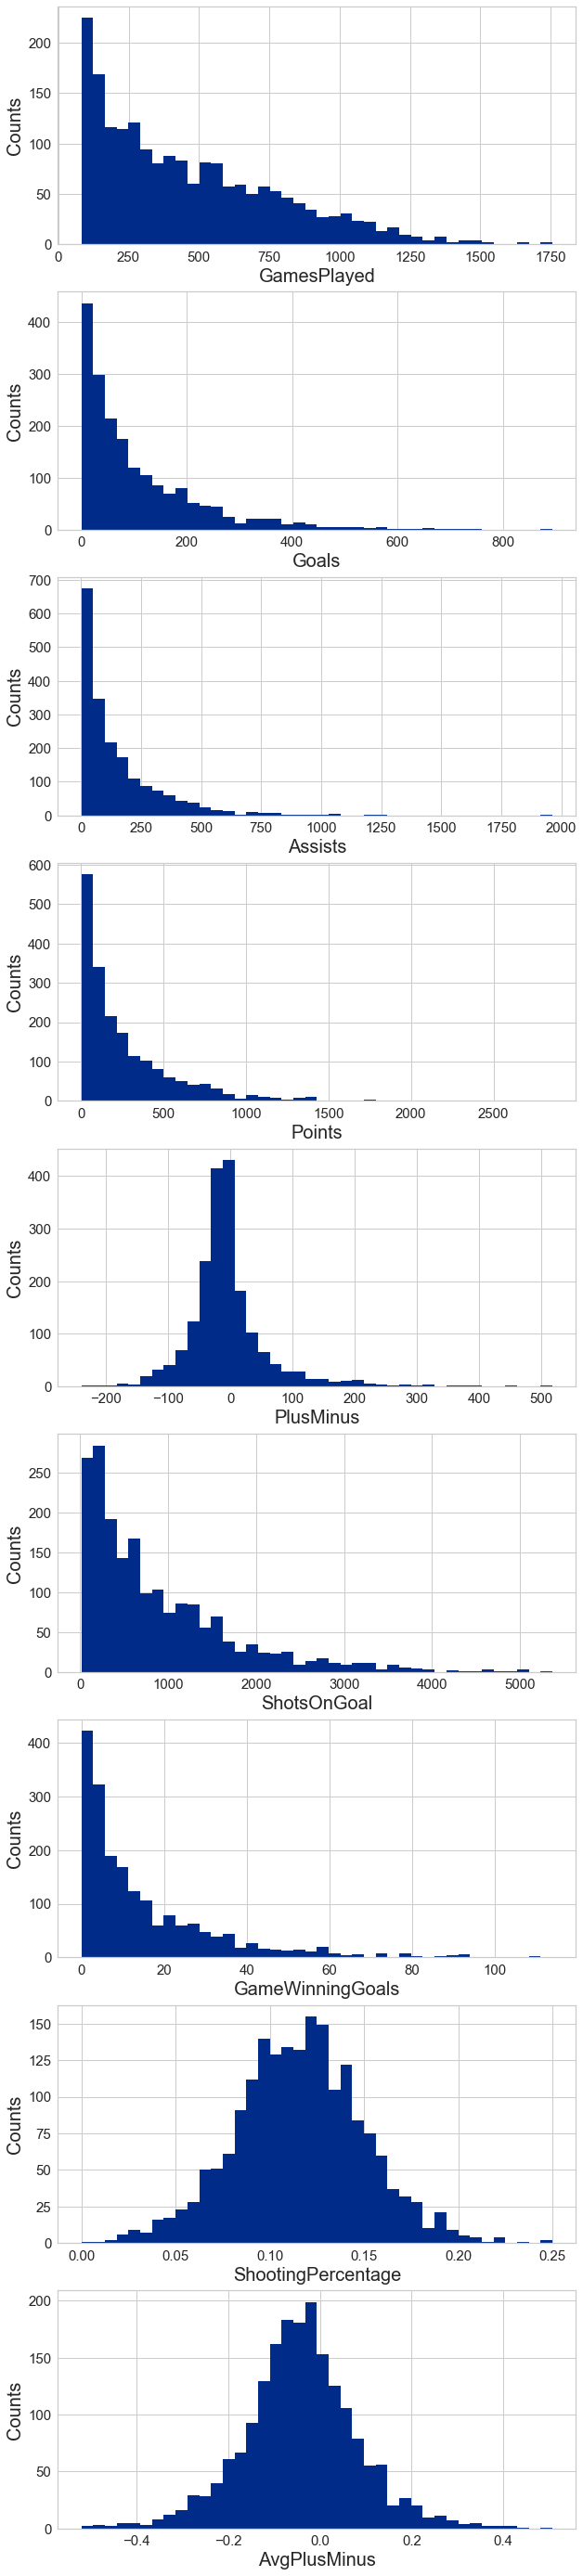

In [7]:
import matplotlib.pyplot as plt

# set up the figure size
plt.rcParams['figure.figsize'] = (10, 50)

# make subplots
fig, axes = plt.subplots(nrows = 9, ncols = 1)

# Specify the features of interest
num_features = ['GamesPlayed', 'Goals', 'Assists', 'Points', 'PlusMinus', 'ShotsOnGoal', 'GameWinningGoals',
               'ShootingPercentage', 'AvgPlusMinus']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]], bins=40, color='#002b88')
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

### Step 7:  Barcharts

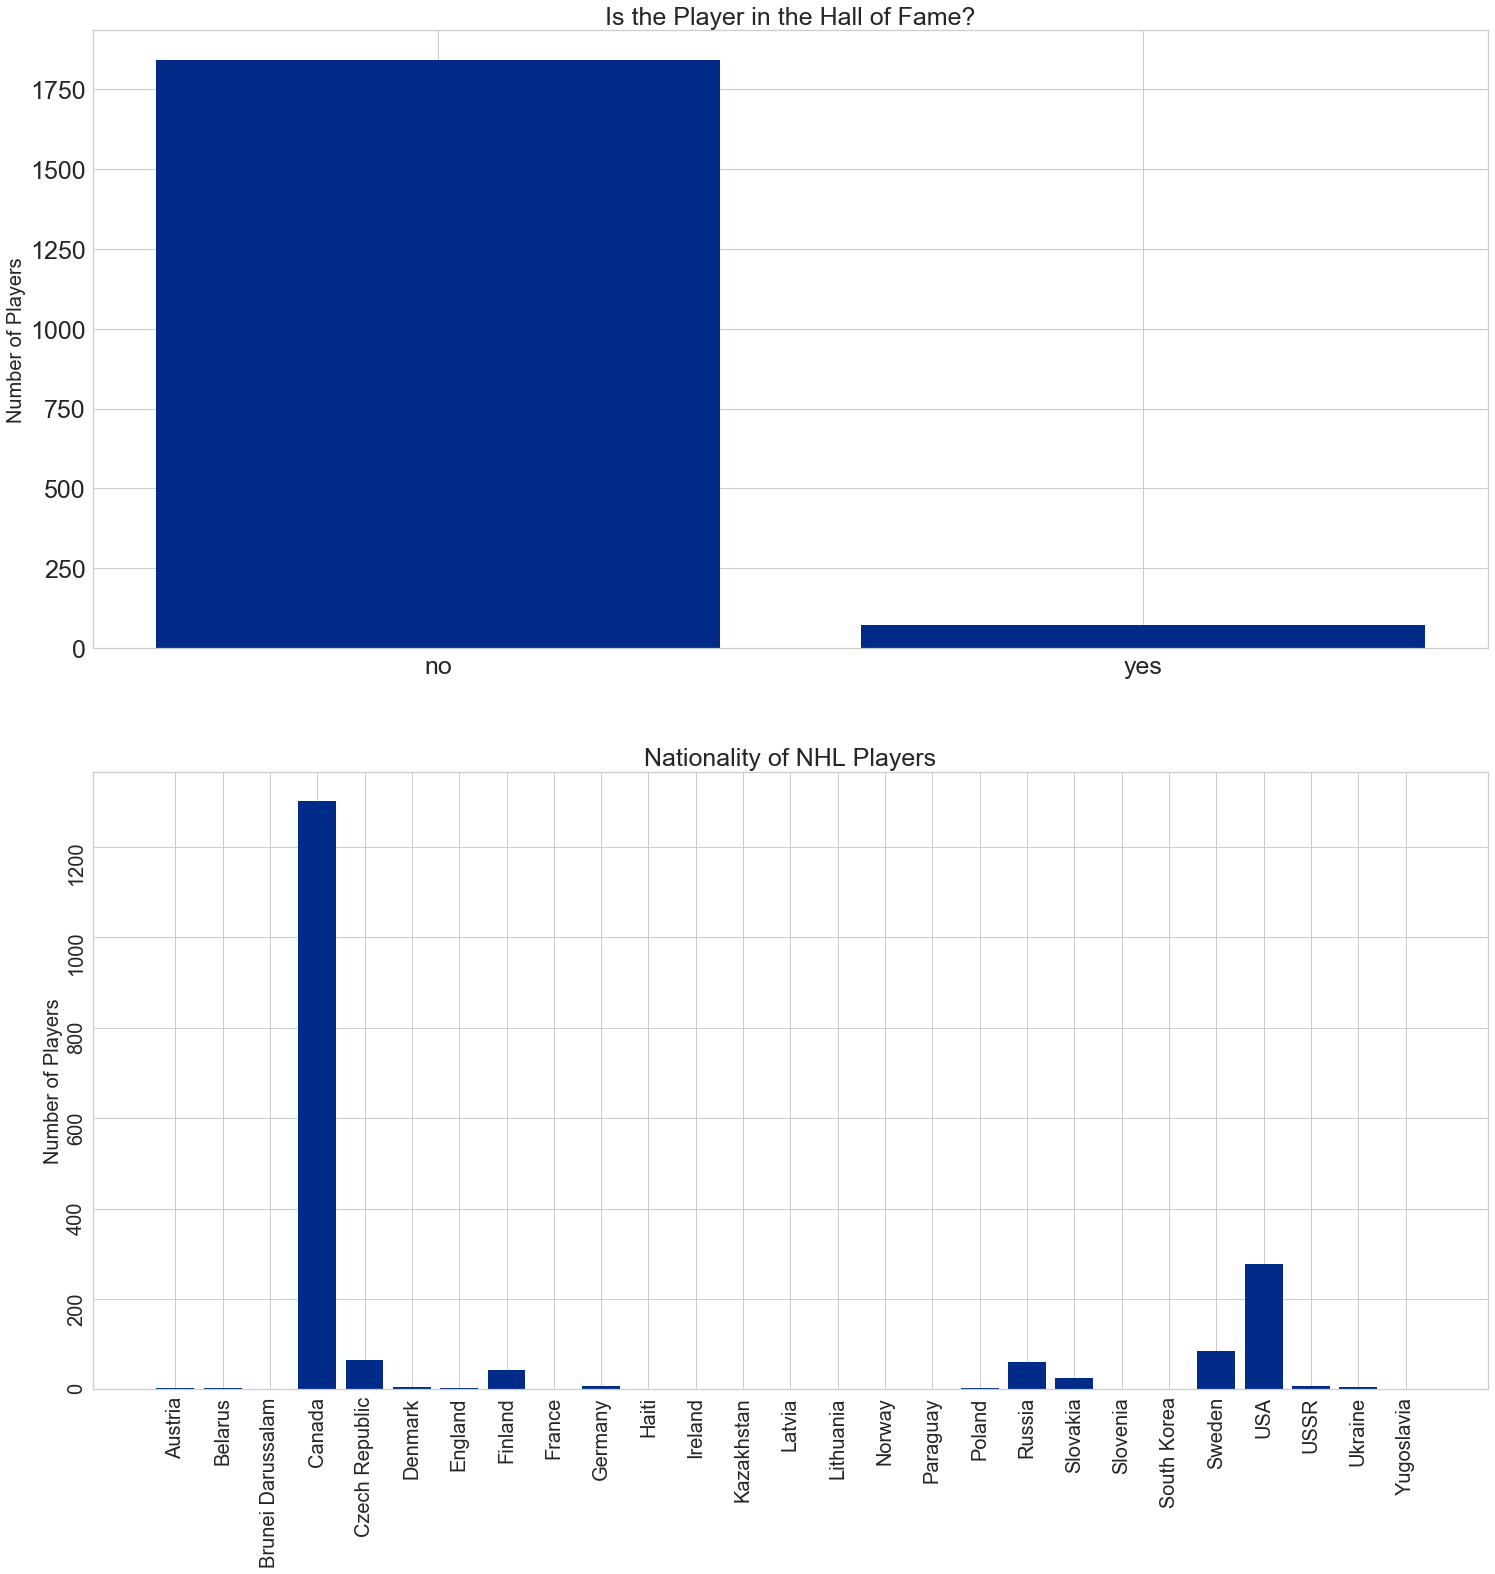

In [8]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (25, 25)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 1)

# make the data read to feed into the visulizer
X_HOF = data.replace({'in_HOF': {1: 'yes', 0: 'no'}}).groupby('in_HOF').size().reset_index(name='Counts')['in_HOF']
Y_HOF = data.replace({'in_HOF': {1: 'yes', 0: 'no'}}).groupby('in_HOF').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[0].bar(X_HOF, Y_HOF, color='#002b88')
axes[0].set_title('Is the Player in the Hall of Fame?', fontsize=25)
axes[0].set_ylabel('Number of Players', fontsize=20)
axes[0].tick_params(axis='both', labelsize=25)

# make the data read to feed into the visulizer
X_Country = data.groupby('Country').size().reset_index(name='Counts')['Country']
Y_Country = data.groupby('Country').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[1].bar(X_Country, Y_Country, color='#002b88')
axes[1].set_title('Nationality of NHL Players', fontsize=25)
axes[1].set_ylabel('Number of Players', fontsize=20)
axes[1].tick_params(axis='both', labelsize=20, rotation=90)
plt.show()

### Step 8:  Scatterplots

/usr/local/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


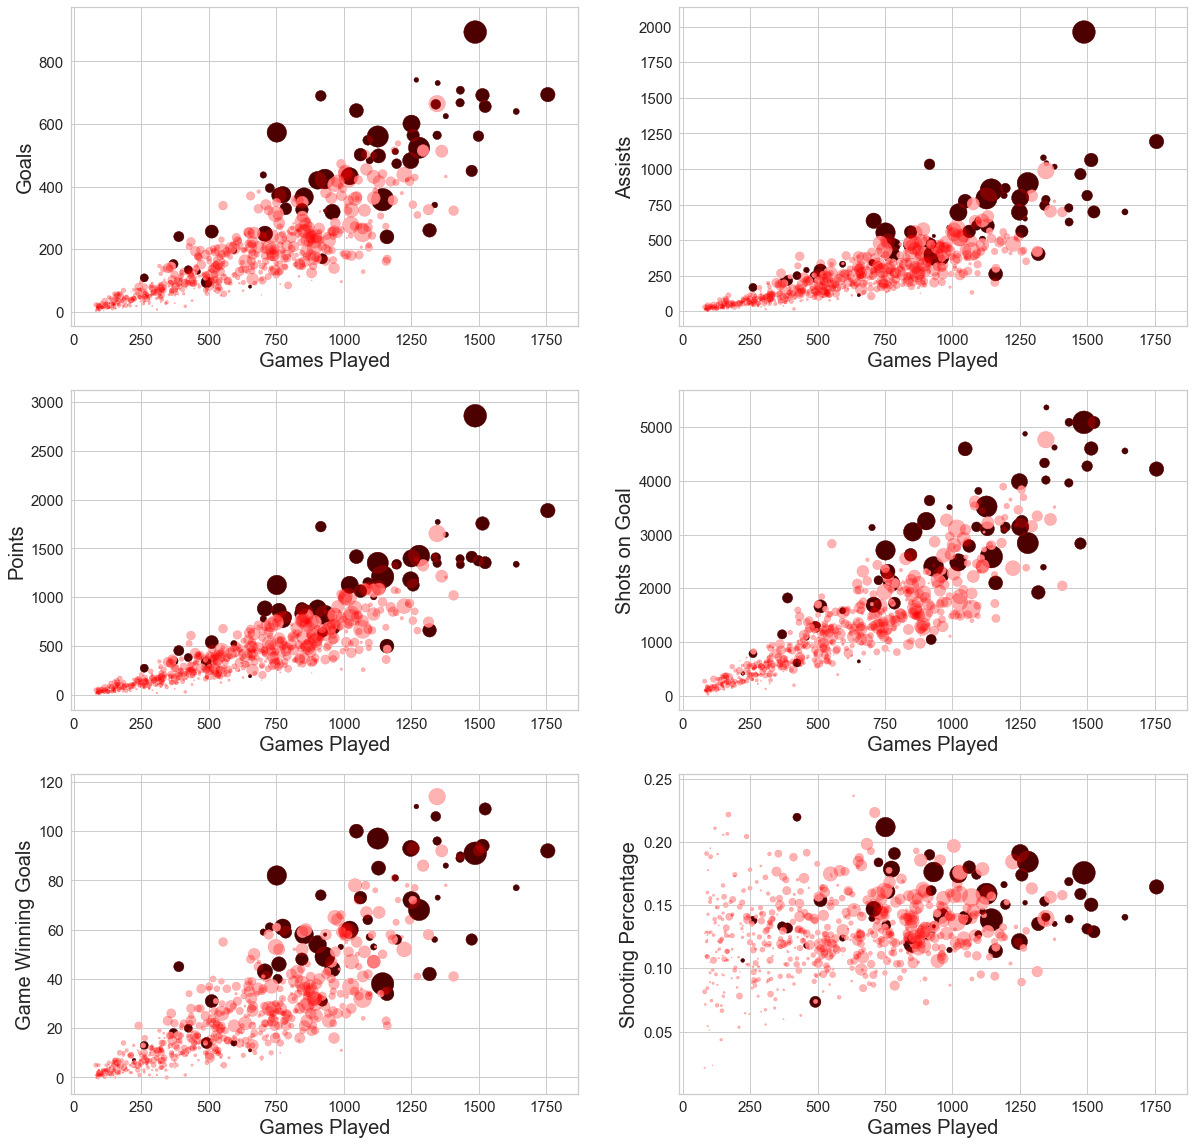

In [9]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 20)

# make subplots
fig, axes = plt.subplots(nrows = 3, ncols = 2)

axes[0, 0].scatter(data.GamesPlayed, data.Goals, s = data.PlusMinus, c = data.in_HOF)
axes[0, 0].scatter(data.GamesPlayed, data.Goals, color='red', alpha = 0.3, s = data.PlusMinus)
axes[0, 0].set_xlabel('Games Played', fontsize=20)
axes[0, 0].set_ylabel('Goals', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

axes[0, 1].scatter(data.GamesPlayed, data.Assists, s = data.PlusMinus, c = data.in_HOF)
axes[0, 1].scatter(data.GamesPlayed, data.Assists, color='red', alpha = 0.3, s = data.PlusMinus)
axes[0, 1].set_xlabel('Games Played', fontsize=20)
axes[0, 1].set_ylabel('Assists', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

axes[1, 0].scatter(data.GamesPlayed, data.Points, s = data.PlusMinus, c = data.in_HOF)
axes[1, 0].scatter(data.GamesPlayed, data.Points, color='red', alpha = 0.3, s = data.PlusMinus)
axes[1, 0].set_xlabel('Games Played', fontsize=20)
axes[1, 0].set_ylabel('Points', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

axes[1, 1].scatter(data.GamesPlayed, data.ShotsOnGoal, s = data.PlusMinus, c = data.in_HOF)
axes[1, 1].scatter(data.GamesPlayed, data.ShotsOnGoal, color='red', alpha = 0.3, s = data.PlusMinus)
axes[1, 1].set_xlabel('Games Played', fontsize=20)
axes[1, 1].set_ylabel('Shots on Goal', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

axes[2, 0].scatter(data.GamesPlayed, data.GameWinningGoals, s = data.PlusMinus, c = data.in_HOF)
axes[2, 0].scatter(data.GamesPlayed, data.GameWinningGoals, color='red', alpha = 0.3, s = data.PlusMinus)
axes[2, 0].set_xlabel('Games Played', fontsize=20)
axes[2, 0].set_ylabel('Game Winning Goals', fontsize=20)
axes[2, 0].tick_params(axis='both', labelsize=15)

axes[2, 1].scatter(data.GamesPlayed, data.ShootingPercentage, s = data.PlusMinus, c = data.in_HOF)
axes[2, 1].scatter(data.GamesPlayed, data.ShootingPercentage, color='red', alpha = 0.3, s = data.PlusMinus)
axes[2, 1].set_xlabel('Games Played', fontsize=20)
axes[2, 1].set_ylabel('Shooting Percentage', fontsize=20)
axes[2, 1].tick_params(axis='both', labelsize=15)

plt.show()

### Step 9: Pearson Ranking

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/yellowbrick/features/rankd.py:216: YellowbrickWarning: RankD plots may be clipped when using matplotlib v3.1.1, upgrade to matplotlib v3.1.2 or later to fix the plots.
  warnings.warn(msg, YellowbrickWarning)


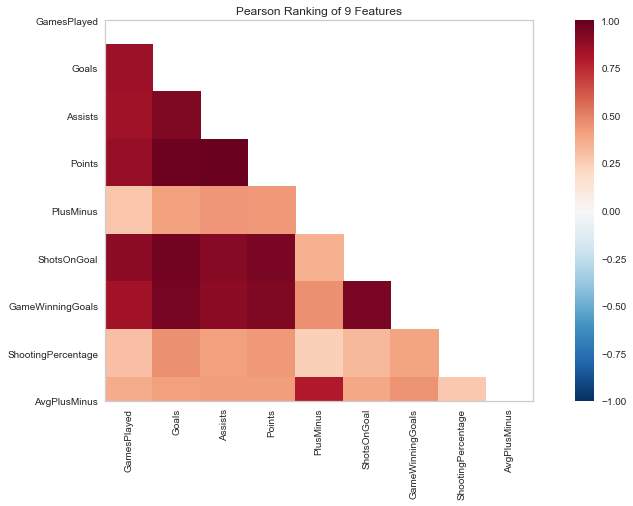

In [10]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = data[num_features].as_matrix()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="pcoords1.png") # Draw/show/poof the data
plt.show()

### Step 10:  Compare distribution of variables between players in/out of the Hall of Fame

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


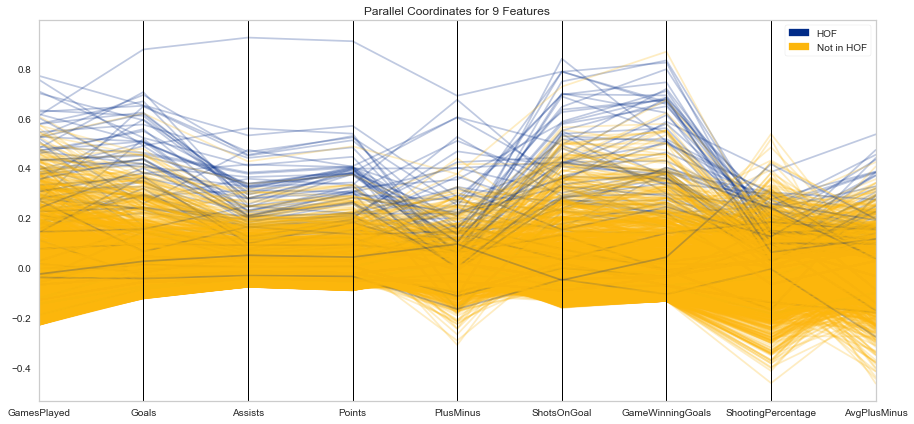

In [11]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette(['#FCB60C', '#002b88'])

# import packages
from yellowbrick.features import ParallelCoordinates

# Specify the features of interest and the classes of the target
classes = ['Not in HOF', 'HOF']
num_features = ['GamesPlayed', 'Goals', 'Assists', 'Points', 'PlusMinus', 'ShotsOnGoal', 'GameWinningGoals',
               'ShootingPercentage', 'AvgPlusMinus']

# copy data to a new dataframe
data_norm = data.copy()

# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna=True)) / (data[feature].max(skipna=True) - data[feature].min(skipna=True))
    
# Extract the numpy arrays from the data frame
X = data_norm[num_features].as_matrix()
y = data.in_HOF.as_matrix()

# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof() # Draw/show/poof the data
plt.show();

### Step 11 - stacked bar charts to compare in/out of the Hall of Fame

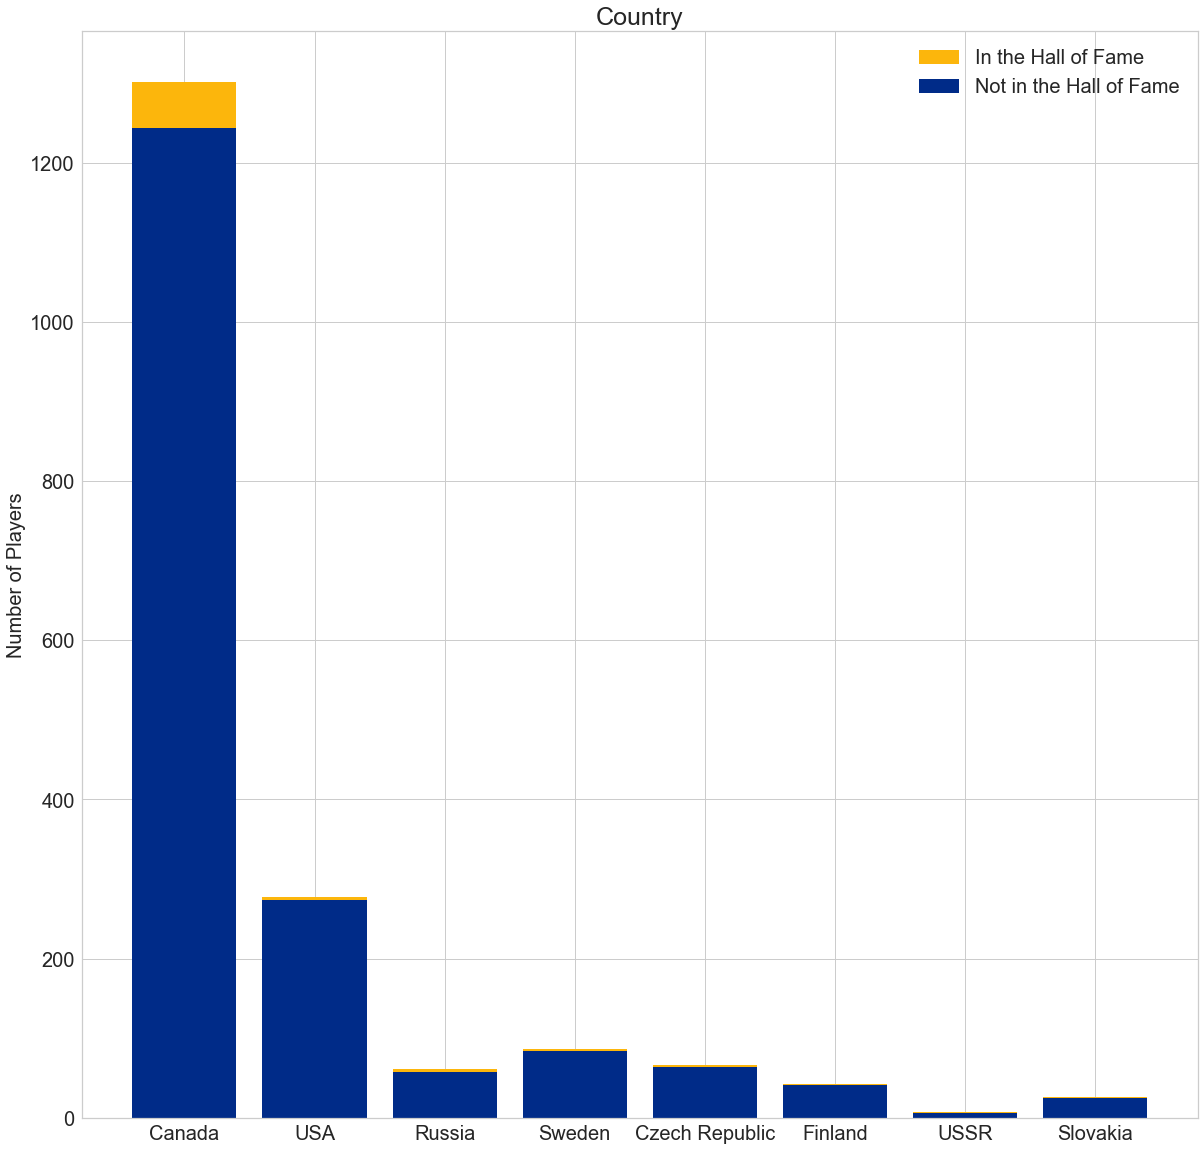

In [12]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 20)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 1)

# make the data read to feed into the visulizer
HOF = data.replace({'in_HOF': {1: 'in_HOF', 0: 'notHOF'}})[data['in_HOF']==1]['Country'].value_counts()
notHOF = data.replace({'in_HOF': {1: 'in_HOF', 0: 'notHOF'}})[data['in_HOF']==0]['Country'].value_counts()
notHOF = notHOF.reindex(index = HOF.index)

# make the bar plot
p1 = axes.bar(notHOF.index, notHOF.values, color = '#002b88')
p2 = axes.bar(HOF.index, HOF.values, bottom = notHOF.values, color = '#FCB60C')
axes.set_title('Country', fontsize=25)
axes.set_ylabel('Number of Players', fontsize=20)
axes.tick_params(axis='both', labelsize=20)
axes.legend((p2[0], p1[0]), ('In the Hall of Fame', 'Not in the Hall of Fame'), fontsize = 20)

plt.show()

### Step 12 - Check for missing values and eliminate features

In [13]:
#Check for any missing values in the dataset
data.isnull().values.any()

False

### Step 13 -  Check the distribution of games played by Hall of Famers

In [14]:
#Create a DataFrame that only consists of Hall of Famers and describe that data
hall = data.loc[data['in_HOF'] == 1]
hall.describe()

,GamesPlayed,Goals,Assists,Points,PlusMinus,ShotsOnGoal,GameWinningGoals,ShootingPercentage,AvgPlusMinus,in_HOF
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.0
mean,987.861111,414.722222,593.833333,1008.555556,121.458333,2769.763889,57.180556,0.147474,0.119634,1.0
std,398.357554,205.743600,334.981479,515.377255,144.845711,1310.717914,29.081879,0.029010,0.165190,0.0
min,150.000000,35.000000,66.000000,103.000000,-132.000000,383.000000,3.000000,0.069721,-0.326683,1.0
25%,745.500000,254.250000,365.250000,658.250000,29.500000,1897.000000,40.000000,0.131778,0.022831,1.0
50%,1011.000000,435.000000,574.500000,1081.000000,93.000000,2746.000000,57.500000,0.143869,0.094317,1.0
75%,1271.500000,564.000000,790.000000,1359.000000,196.250000,3754.000000,81.250000,0.166877,0.236382,1.0
max,1756.000000,894.000000,1963.000000,2857.000000,518.000000,5366.000000,110.000000,0.219672,0.506649,1.0


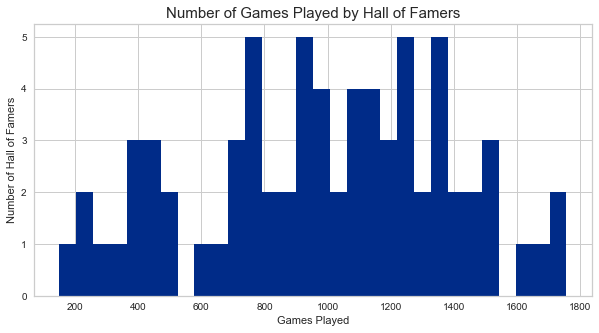

In [15]:
#In the scatterplots, it looked like there weren't many Hall of Famers with fewer than 500 games played
#I want to check the distribution of games played by Hall of Famers to see if I can filter out some players

plt.rcParams['figure.figsize'] = (10, 5)
plt.hist(hall['GamesPlayed'], bins = 30, color='#002b88')
plt.xlabel('Games Played')
plt.ylabel('Number of Hall of Famers')
plt.title('Number of Games Played by Hall of Famers', size = 15)
plt.show()

### Step 14 - Drop players that have played fewer than 500 games in their career

In [16]:
#From that distribution, I can see that the majority of Hall of Famers have played at least 500 games
vets = data.loc[data['GamesPlayed'] >= 500]
vets.describe()

,GamesPlayed,Goals,Assists,Points,PlusMinus,ShotsOnGoal,GameWinningGoals,ShootingPercentage,AvgPlusMinus,in_HOF
count,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,798.582461,213.895288,295.323298,509.218586,11.842932,1631.270942,29.675393,0.127214,0.007627,0.078534
std,234.512690,133.183137,195.122488,318.232839,95.564441,869.806330,19.615822,0.028057,0.114425,0.269186
min,501.000000,9.000000,21.000000,39.000000,-240.000000,156.000000,0.000000,0.042857,-0.331871,0.000000
25%,608.000000,120.750000,165.000000,288.000000,-46.250000,1037.500000,16.000000,0.107872,-0.065217,0.000000
50%,750.500000,184.000000,249.000000,434.000000,-3.000000,1415.000000,25.000000,0.125837,-0.003422,0.000000
75%,943.500000,266.000000,379.750000,658.500000,54.000000,2036.750000,37.250000,0.144858,0.069828,0.000000
max,1756.000000,894.000000,1963.000000,2857.000000,518.000000,5366.000000,114.000000,0.236590,0.506649,1.000000


### Step 15 - Generate the scatterplots again with the new data

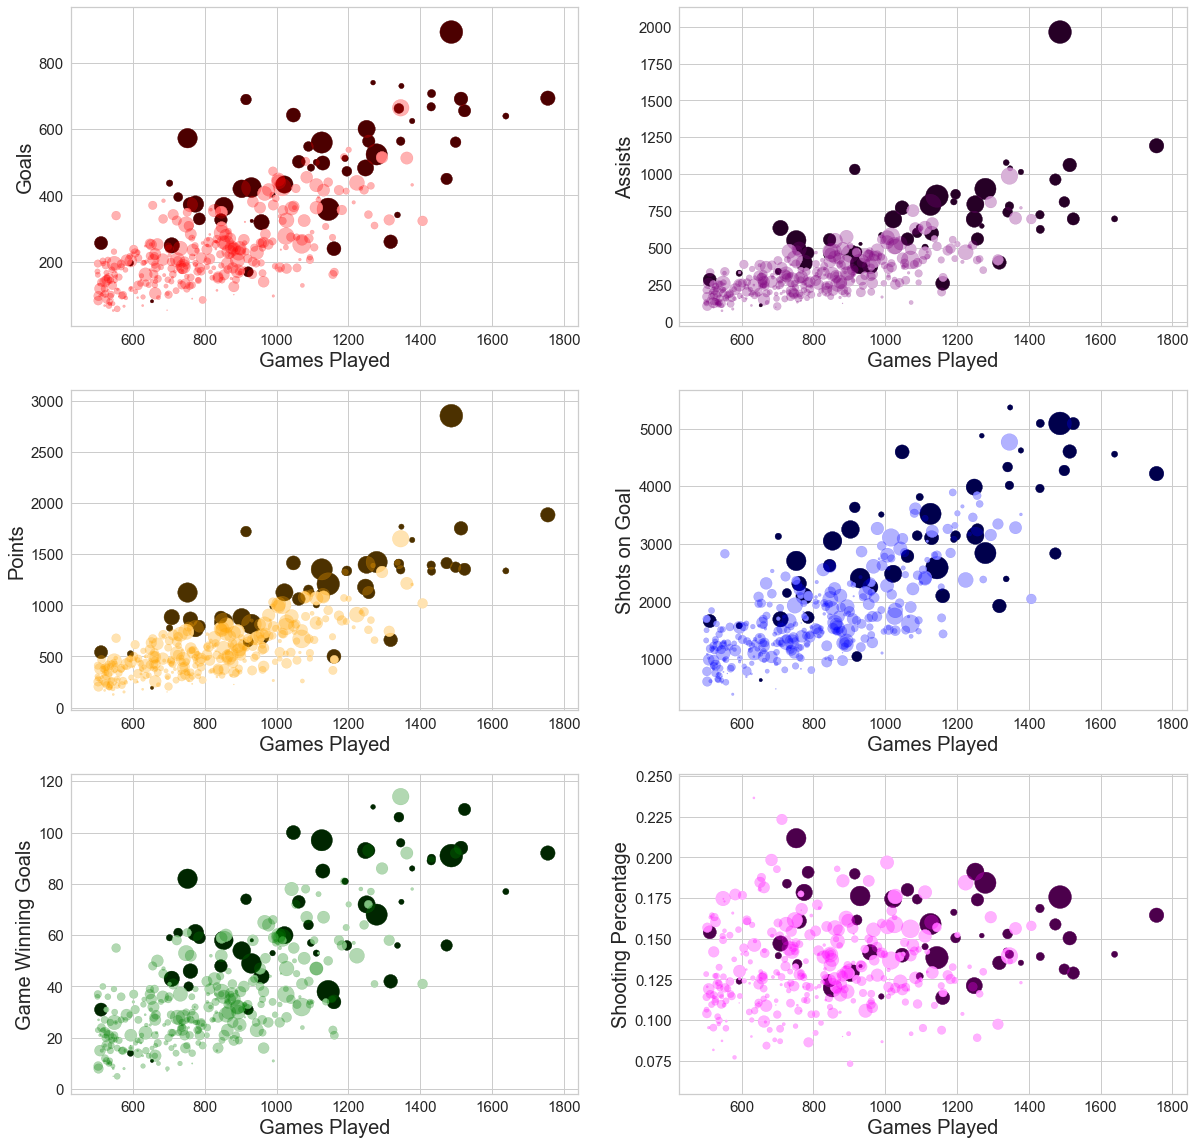

In [17]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 20)

# make subplots
fig, axes = plt.subplots(nrows = 3, ncols = 2)

axes[0, 0].scatter(vets.GamesPlayed, vets.Goals, s = vets.PlusMinus, c = vets.in_HOF)
axes[0, 0].scatter(vets.GamesPlayed, vets.Goals, color='red', alpha = 0.3, s = vets.PlusMinus)
axes[0, 0].set_xlabel('Games Played', fontsize=20)
axes[0, 0].set_ylabel('Goals', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

axes[0, 1].scatter(vets.GamesPlayed, vets.Assists, s = vets.PlusMinus, c = vets.in_HOF)
axes[0, 1].scatter(vets.GamesPlayed, vets.Assists, color='purple', alpha = 0.3, s = vets.PlusMinus)
axes[0, 1].set_xlabel('Games Played', fontsize=20)
axes[0, 1].set_ylabel('Assists', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

axes[1, 0].scatter(vets.GamesPlayed, vets.Points, s = vets.PlusMinus, c = vets.in_HOF)
axes[1, 0].scatter(vets.GamesPlayed, vets.Points, color='orange', alpha = 0.3, s = vets.PlusMinus)
axes[1, 0].set_xlabel('Games Played', fontsize=20)
axes[1, 0].set_ylabel('Points', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

axes[1, 1].scatter(vets.GamesPlayed, vets.ShotsOnGoal, s = vets.PlusMinus, c = vets.in_HOF)
axes[1, 1].scatter(vets.GamesPlayed, vets.ShotsOnGoal, color='blue', alpha = 0.3, s = vets.PlusMinus)
axes[1, 1].set_xlabel('Games Played', fontsize=20)
axes[1, 1].set_ylabel('Shots on Goal', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

axes[2, 0].scatter(vets.GamesPlayed, vets.GameWinningGoals, s = vets.PlusMinus, c = vets.in_HOF)
axes[2, 0].scatter(vets.GamesPlayed, vets.GameWinningGoals, color='green', alpha = 0.3, s = vets.PlusMinus)
axes[2, 0].set_xlabel('Games Played', fontsize=20)
axes[2, 0].set_ylabel('Game Winning Goals', fontsize=20)
axes[2, 0].tick_params(axis='both', labelsize=15)

axes[2, 1].scatter(vets.GamesPlayed, vets.ShootingPercentage, s = vets.PlusMinus, c = vets.in_HOF)
axes[2, 1].scatter(vets.GamesPlayed, vets.ShootingPercentage, color='magenta', alpha = 0.3, s = vets.PlusMinus)
axes[2, 1].set_xlabel('Games Played', fontsize=20)
axes[2, 1].set_ylabel('Shooting Percentage', fontsize=20)
axes[2, 1].tick_params(axis='both', labelsize=15)

plt.show()

### Step 16 - Convert categorical data to numbers

In [18]:
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(vets['Country'])

# check the data
data_cat_dummies.head(8)

,Austria,Brunei Darussalam,Canada,Czech Republic,England,Finland,France,Germany,Ireland,Latvia,Lithuania,Paraguay,Poland,Russia,Slovakia,South Korea,Sweden,USA,Ukraine,Yugoslavia
1794,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Step 17: Merge the new columns with the full dataset

In [19]:
#Merge the new dataframe with the complete dataset of players with 500+ games played
vets = vets.merge(data_cat_dummies, left_index = True, right_index=True)
vets.shape

(764, 32)

In [20]:
#Let's check what the dataframe looks like now
vets.head()

,Name,Country,GamesPlayed,Goals,Assists,Points,PlusMinus,ShotsOnGoal,GameWinningGoals,ShootingPercentage,AvgPlusMinus,in_HOF,Austria,Brunei Darussalam,Canada,Czech Republic,England,Finland,France,Germany,Ireland,Latvia,Lithuania,Paraguay,Poland,Russia,Slovakia,South Korea,Sweden,USA,Ukraine,Yugoslavia
1794,"Vanek, Thomas",Austria,547,230,217,447,35,1516,39,0.151715,0.063985,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Adams, Craig",Brunei Darussalam,751,46,87,133,-64,748,6,0.061497,-0.085220,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Acton, Keith",Canada,1023,226,358,584,-24,1690,29,0.133728,-0.023460,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Adams, Greg",Canada,545,84,143,227,1,696,5,0.120690,0.001835,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,"Adams, Greg",Canada,1056,355,388,743,-48,2326,31,0.152623,-0.045455,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Step 18 - Find features with a correlation greater than 0.8

In [21]:
import numpy as np

#I want to select only the numeric columns from our now reduced dataset
num_colums = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = list(vets.select_dtypes(include=num_colums).columns)
vetsNum = vets[numerical_columns]

#I am going to drop all the numerical features that have a correlation greater than 0.8
#If variables are that highly correlated, they are providing redundant information
correlated_features = set()
correlation_matrix = vetsNum.corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)


print(correlated_features)

{'Assists', 'Points', 'AvgPlusMinus', 'ShotsOnGoal', 'GameWinningGoals'}


### Step 19 - Drop the columns that are no longer needed

In [22]:
#I'm going to manually select everything except the four columns that have 80%+ correlation
#I will also drop the 'Country' column because we have already split that into individual columns per country
step2 = vets[['Name', 'GamesPlayed', 'Goals', 'PlusMinus', 'ShotsOnGoal', 'ShootingPercentage',
              'in_HOF', 'Austria', 'Brunei Darussalam', 'Canada', 'Czech Republic', 'England', 
              'Finland', 'France', 'Germany', 'Ireland', 'Latvia', 'Lithuania', 'Paraguay', 'Poland', 
              'Russia', 'Slovakia', 'South Korea', 'Sweden', 'USA', 'Ukraine', 'Yugoslavia']]

#Let's see what our dataframe looks like now
step2.head()

,Name,GamesPlayed,Goals,PlusMinus,ShotsOnGoal,ShootingPercentage,in_HOF,Austria,Brunei Darussalam,Canada,Czech Republic,England,Finland,France,Germany,Ireland,Latvia,Lithuania,Paraguay,Poland,Russia,Slovakia,South Korea,Sweden,USA,Ukraine,Yugoslavia
1794,"Vanek, Thomas",547,230,35,1516,0.151715,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Adams, Craig",751,46,-64,748,0.061497,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Acton, Keith",1023,226,-24,1690,0.133728,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Adams, Greg",545,84,1,696,0.120690,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,"Adams, Greg",1056,355,-48,2326,0.152623,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Step 20 - create a whole features dataset that can be used for train and validation data splitting

In [159]:
# I already combined the numerical features and the dummy features together in step 19
# That combined dataset will be used as data_model_X
data_model_X = step2.drop('Name', axis=1)

# create a whole target dataset that can be used for train and validation data splitting
data_model_y = data_model_X.replace({'in_HOF': {1: 'In', 0: 'Out'}})['in_HOF']
# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.2, random_state=42)

# number of samples in each set
print("Number of samples in training set: ", X_train.shape[0])
print("Number of samples in validation set:", X_val.shape[0])

# Survived and not-survived
print('\n')
print('Number of players in/out of the Hall of Fame in the training set:')
print(y_train.value_counts())

print('\n')
print('Number of players in/out of the Hall of Fame in the validation set:')
print(y_val.value_counts())

Number of samples in training set:  611
Number of samples in validation set: 153


Number of players in/out of the Hall of Fame in the training set:
Out    568
In      43
Name: in_HOF, dtype: int64


Number of players in/out of the Hall of Fame in the validation set:
Out    136
In      17
Name: in_HOF, dtype: int64


### Step 21 - Eval Metrics

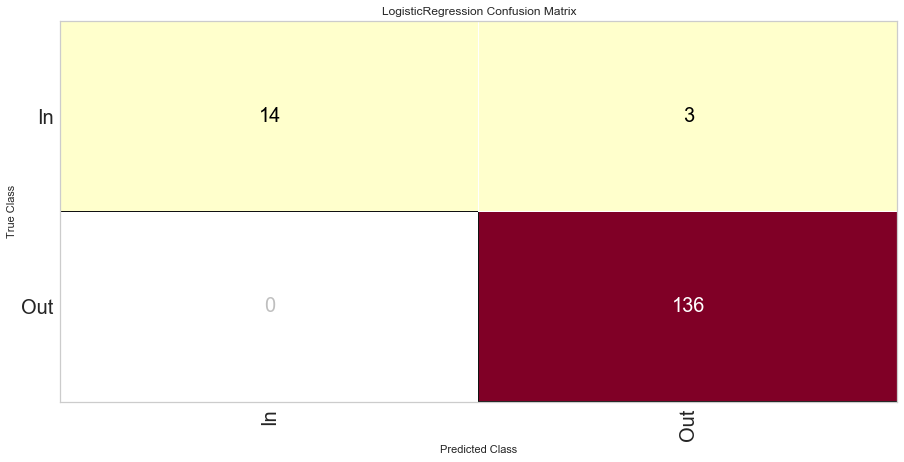

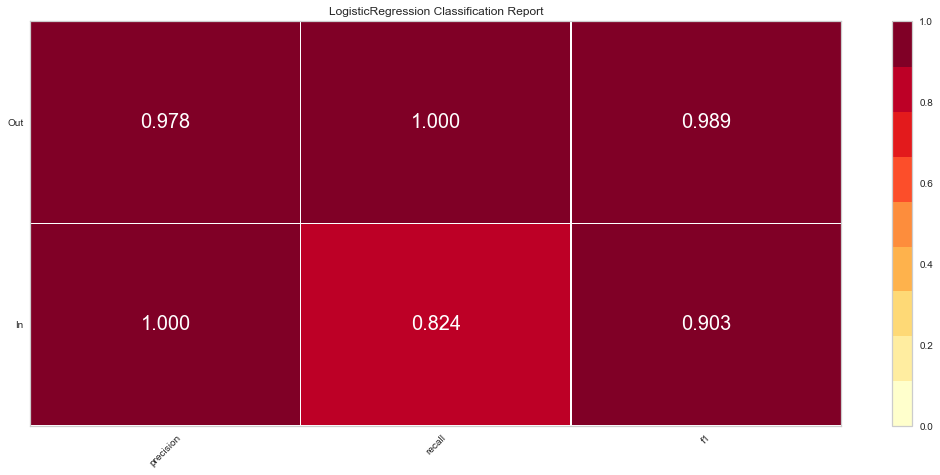

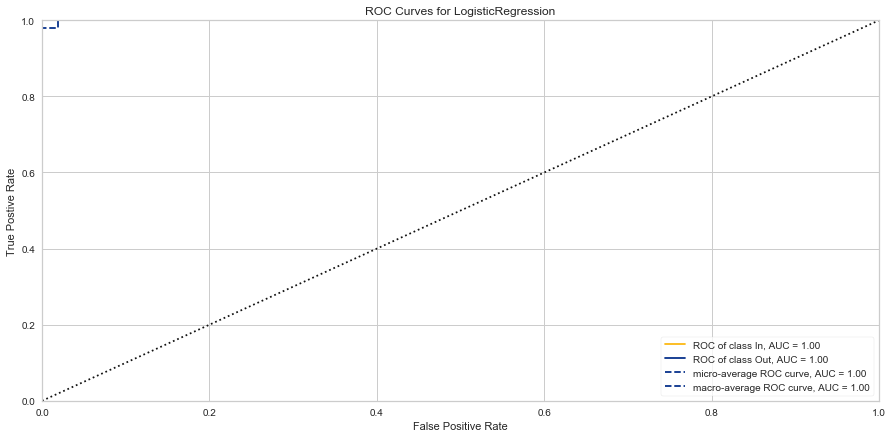

In [160]:
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression(solver = 'liblinear')

#The ConfusionMatrix visualizer taxes a model
classes = ['In','Out']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()